# Project#2 Washington Post of Police Shooting in the United States

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt

# The analysis of the dataset containing the info for the people killed in an encounter 

In [14]:
df1 = pd.read_csv("2023-10-10-washington-post-police-shootings-export.csv")

In [15]:
df1.head()

date                name   age gender    armed      race     city  \
0  02/01/15    Lewis Lee Lembke  47.0   male      gun     White    Aloha   
1  02/01/15          Tim Elliot  53.0   male      gun     Asian  Shelton   
2  03/01/15  John Paul Quintero  23.0   male  unarmed  Hispanic  Wichita   
3  04/01/15   Kenneth Joe Brown  18.0   male      gun     White  Guthrie   
4  04/01/15   Michael Rodriguez  39.0   male    other  Hispanic    Evans   

  state flee  body_camera  signs_of_mental_illness  \
0    OR  not        False                    False   
1    WA  not        False                     True   
2    KS  not        False                    False   
3    OK  not        False                    False   
4    CO  not        False                    False   

              police_departments_involved  
0  Washington County Sheriff's Office, OR  
1       Mason County Sheriff's Office, WA  
2           Wichita Police Department, KS  
3             Oklahoma Highway Patrol, OK  
4             Evans Police Department, CO

In [16]:
df1.tail()

date                name   age gender         armed     race  \
8765  02/10/23         Jahad Snead  44.0   male           gun    Black   
8766  02/10/23                 NaN  44.0   male         knife  Unknown   
8767  03/10/23                 NaN   NaN   male  undetermined  Unknown   
8768  06/10/23                 NaN  54.0   male           gun  Unknown   
8769  07/10/23  Jeremy Rollenhagen  37.0   male           gun    White   

               city state flee  body_camera  signs_of_mental_illness  \
8765   Philadelphia    PA  NaN        False                    False   
8766         Manteo    NC  not        False                    False   
8767  Lawrenceville    GA  NaN        False                    False   
8768       Cut Bank    MT  NaN        False                    False   
8769            NaN    KY  car        False                    False   

              police_departments_involved  
8765   Philadelphia Police Department, PA  
8766     Dare County Sheriff's Office, NC  
8767  Lawrenceville Police Department, GA  
8768       Cut Bank Police Department, MT  
8769            Kentucky State Police, KY

In [17]:
df1.describe()

age
count  8165.000000
mean     37.291611
std      12.991756
min       2.000000
25%      27.000000
50%      35.000000
75%      45.000000
max      92.000000

In [18]:
column_median = df1['age'].median()
column_skewness = skew(df1['age'])
column_kurtosis = kurtosis(df1['age'])
print(f"Median for Age : {column_median}")
print(f"Skewness for Age : {column_skewness}")
print(f"Kurtosis for Age : {column_kurtosis}")

Median for Age : 35.0
Skewness for Age : nan
Kurtosis for Age : nan


### Unveil the data counts as per the shooting happened in year from 2015 to till date

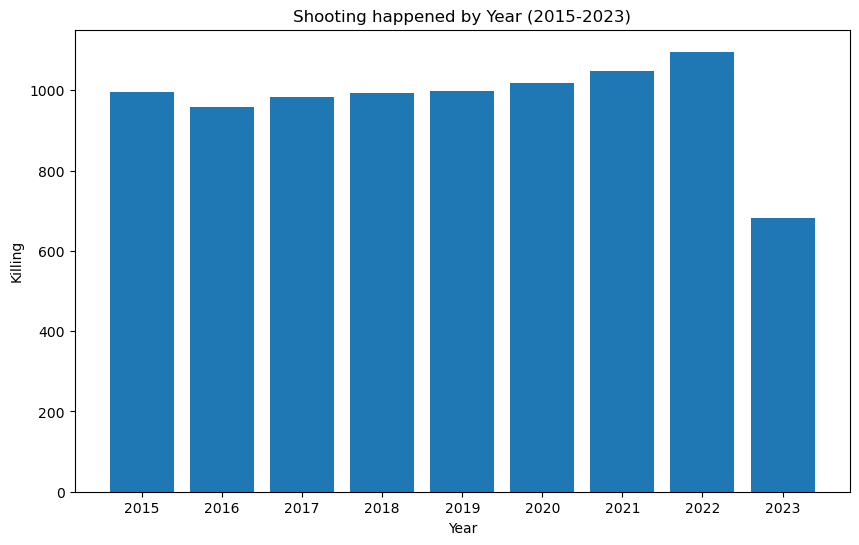

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('2023-10-10-washington-post-police-shootings-export.csv')
data['Date'] = pd.to_datetime(data['date']) 

# Create a list of years from 2015 to 2023
years = range(2015, 2024)

# Count the occurrences of each year in your data
year_counts = [len(data[data['Date'].dt.year == year]) for year in years]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(years, year_counts, tick_label=years)
plt.xlabel('Year')
plt.ylabel('Killing')
plt.title('Shooting happened by Year (2015-2023)')
plt.show()


### Plotting the data for the age group of the people killed, that on the basis of Race

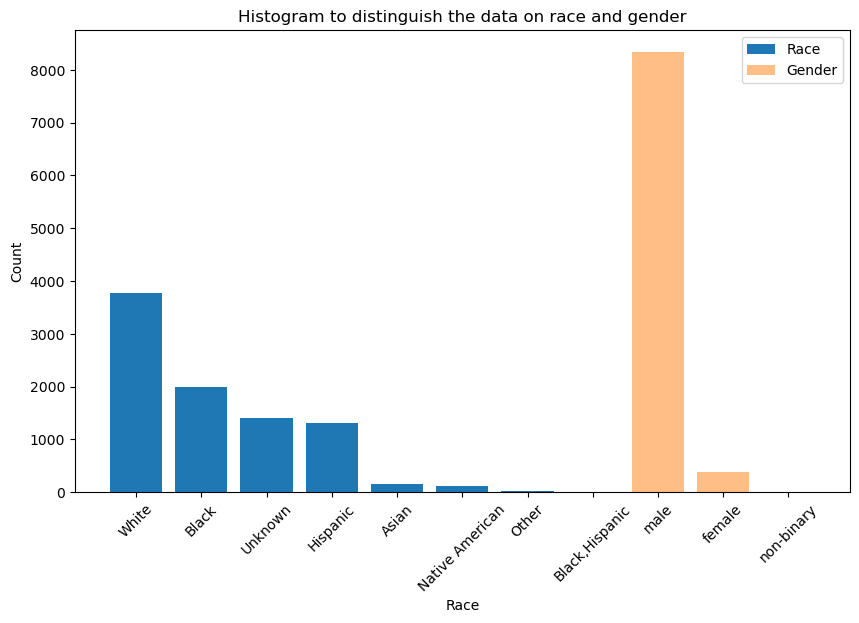

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV dataset
data = pd.read_csv('2023-10-10-washington-post-police-shootings-export.csv')  # Replace 'your_dataset.csv' with the path to your CSV file

column1 = 'race'  
column2 = 'gender'  

# Count the occurrences of unique values in each column
value_counts1 = data[column1].value_counts()
value_counts2 = data[column2].value_counts()

# Create a bar chart to visualize the data
plt.figure(figsize=(10, 6))  
plt.bar(value_counts1.index, value_counts1.values, label='Race')
plt.bar(value_counts2.index, value_counts2.values, label='Gender', alpha=0.5)  # Use alpha to make the bars semi-transparent
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Histogram to distinguish the data on race and gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()

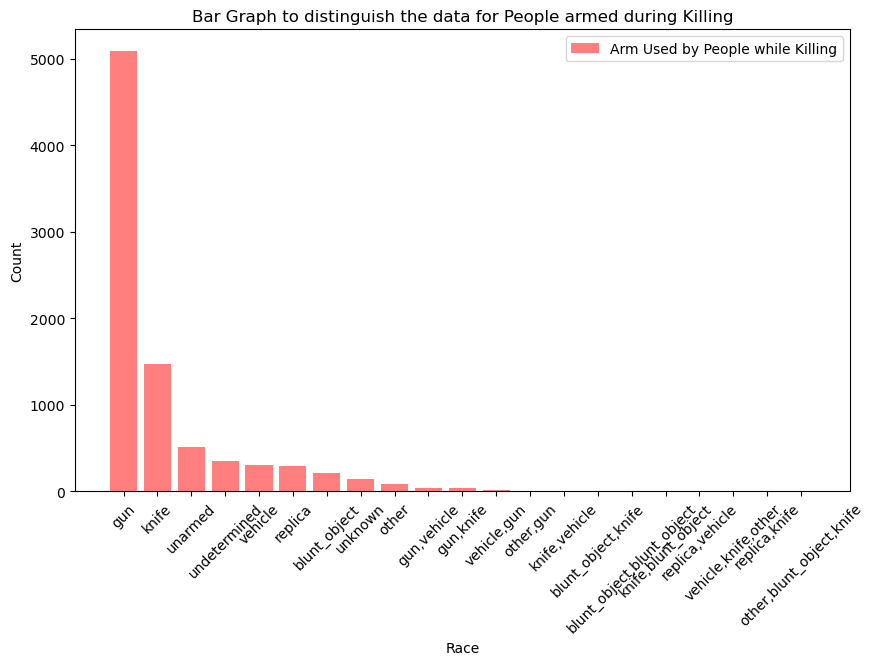

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV dataset
data = pd.read_csv('2023-10-10-washington-post-police-shootings-export.csv') 

column = 'armed'  
value_counts2 = data[column].value_counts()

# Create a bar chart to visualize the data
plt.figure(figsize=(10, 6))  
plt.bar(value_counts2.index, value_counts2.values, label='Arm Used by People while Killing', alpha=0.5, color='red')  # Use alpha to make the bars semi-transparent
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Bar Graph to distinguish the data for People armed during Killing')
plt.xticks(rotation=45) 
plt.legend()
plt.show()

### Clustering technique to analyse the data on the basis of Age, Gender, City, State, and Police Department

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
data = pd.read_csv('2023-10-10-washington-post-police-shootings-export.csv')

# Select the string column you want to cluster on
string_columns = 'race'

# Use label encoding to convert the string column to numeric
label_encoder = LabelEncoder()
data['encoded_' + string_columns] = label_encoder.fit_transform(data[string_columns])

# Standardize the data (important for K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['encoded_' + string_columns]])

# Create a K-Means model and specify the number of clusters (K)
kmeans = KMeans(n_clusters=3, n_init=10)  # You can adjust the number of clusters as needed

# Fit the model and obtain cluster labels
cluster_labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Print the resulting clusters
print(data[['Cluster', string_columns]])

      Cluster      race
0           0     White
1           1     Asian
2           2  Hispanic
3           0     White
4           2  Hispanic
...       ...       ...
8765        1     Black
8766        0   Unknown
8767        0   Unknown
8768        0   Unknown
8769        0     White

[8770 rows x 2 columns]


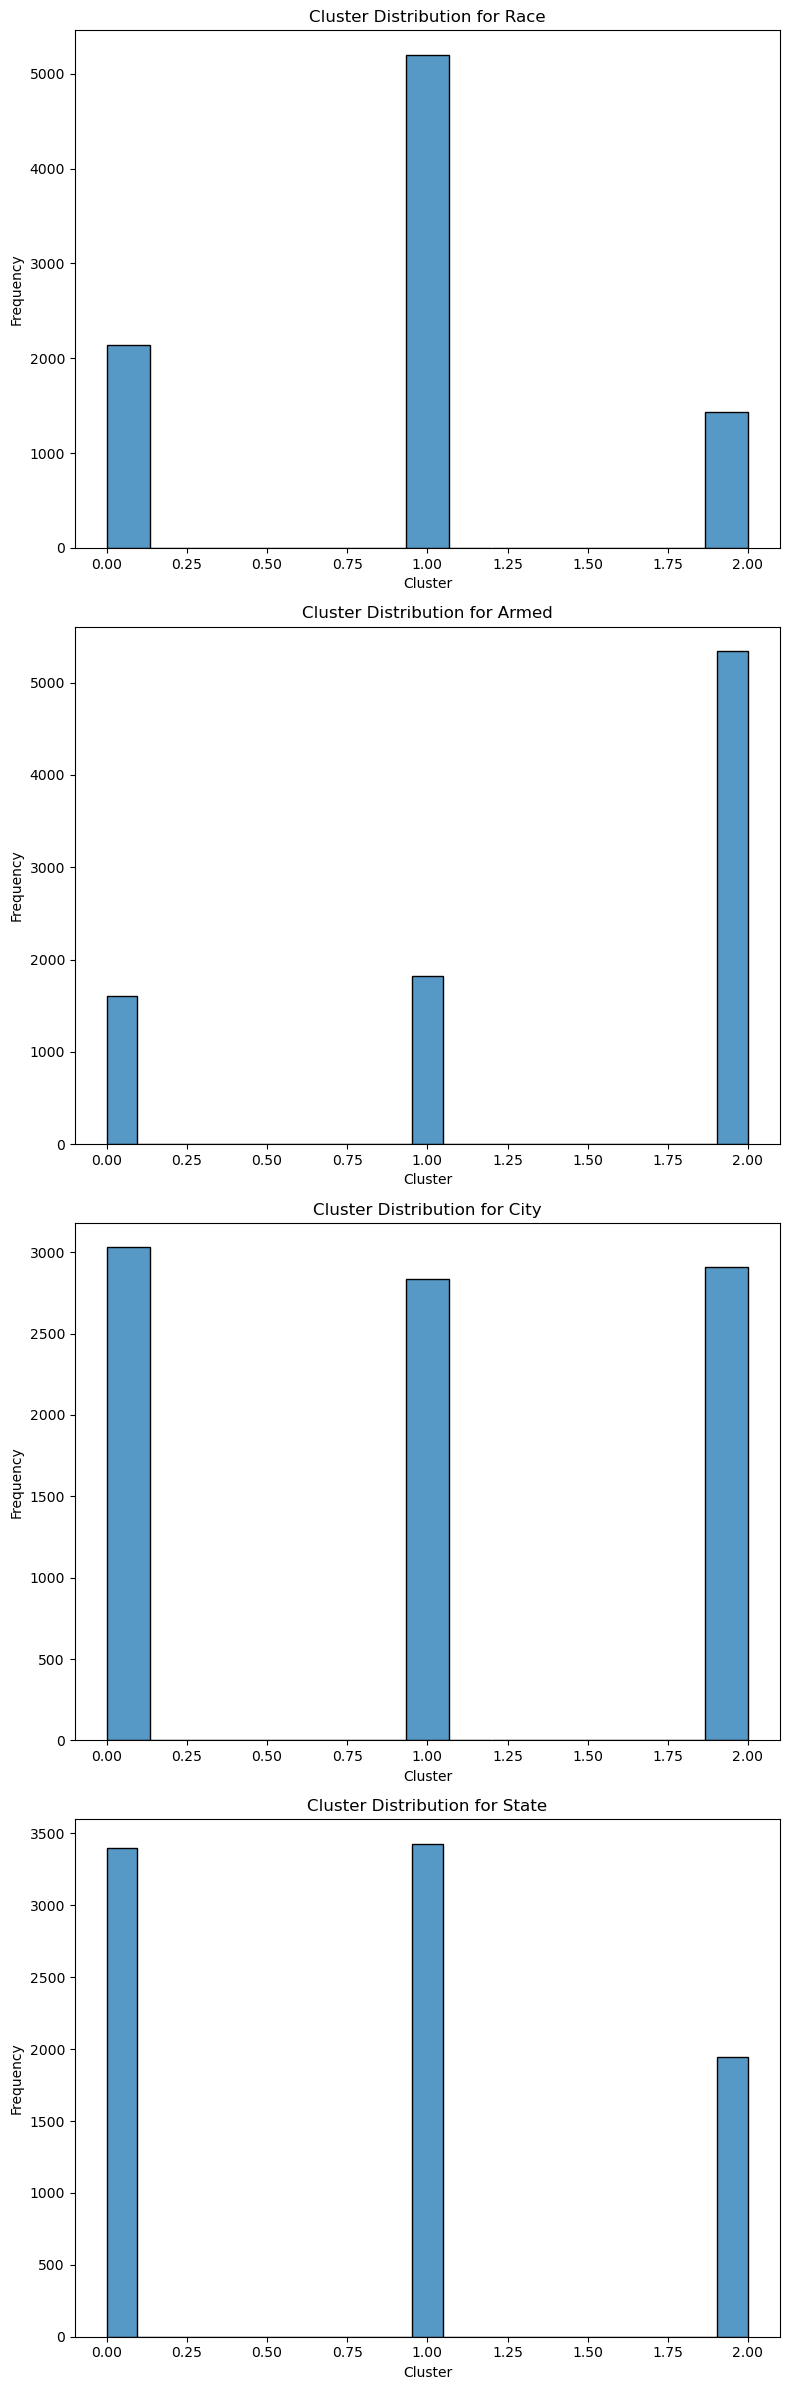

In [138]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('2023-10-10-washington-post-police-shootings-export.csv')

# Specify the string columns you want to cluster on
string_columns = ['race', 'armed', 'city', 'state']  # Add or remove columns as needed

# Set up subplots
fig, axes = plt.subplots(nrows=len(string_columns), ncols=1, figsize=(8, 6 * len(string_columns)))

# Loop through each string column
for i, string_column in enumerate(string_columns):
    # Use label encoding to convert the string column to numeric
    label_encoder = LabelEncoder()
    data['encoded_' + string_column] = label_encoder.fit_transform(data[string_column])

    # Standardize the data (important for K-Means)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[['encoded_' + string_column]])

    # Create a K-Means model and specify the number of clusters (K)
    kmeans = KMeans(n_clusters=3, n_init=10)  # You can adjust the number of clusters as needed

    # Fit the model and obtain cluster labels
    cluster_labels = kmeans.fit_predict(data_scaled)

    # Add cluster labels to the original data
    data['Cluster_' + string_column] = cluster_labels

    # Plot histogram for cluster distribution
    sns.histplot(data=data, x='Cluster_' + string_column, kde=False, ax=axes[i])
    axes[i].set_title(f'Cluster Distribution for {string_column.capitalize()}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('cluster_distribution_plot.png')
plt.show()

<Figure size 800x600 with 0 Axes>

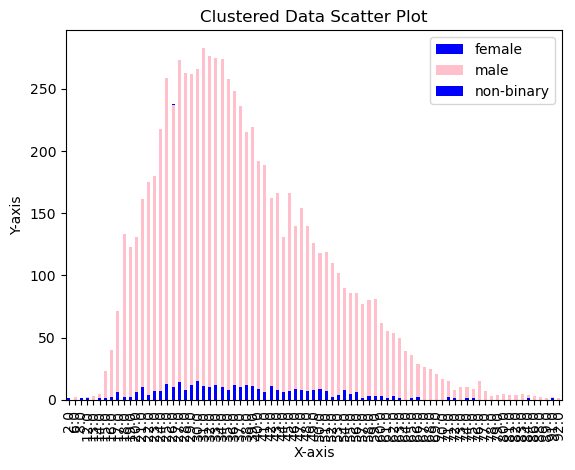

In [139]:
import matplotlib.pyplot as plt

# Scatter plot the clustered data
plt.figure(figsize=(8, 6))
cluster_gender_counts = data.groupby(['age', 'gender']).size().unstack(fill_value=0)
cluster_gender_counts.plot(kind='bar', stacked=True, color=['blue', 'pink'])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Clustered Data Scatter Plot')
plt.legend()
plt.show()

/var/folders/g8/mxccscmj14l9stg98tmxsc2h0000gn/T/ipykernel_3899/3318368408.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


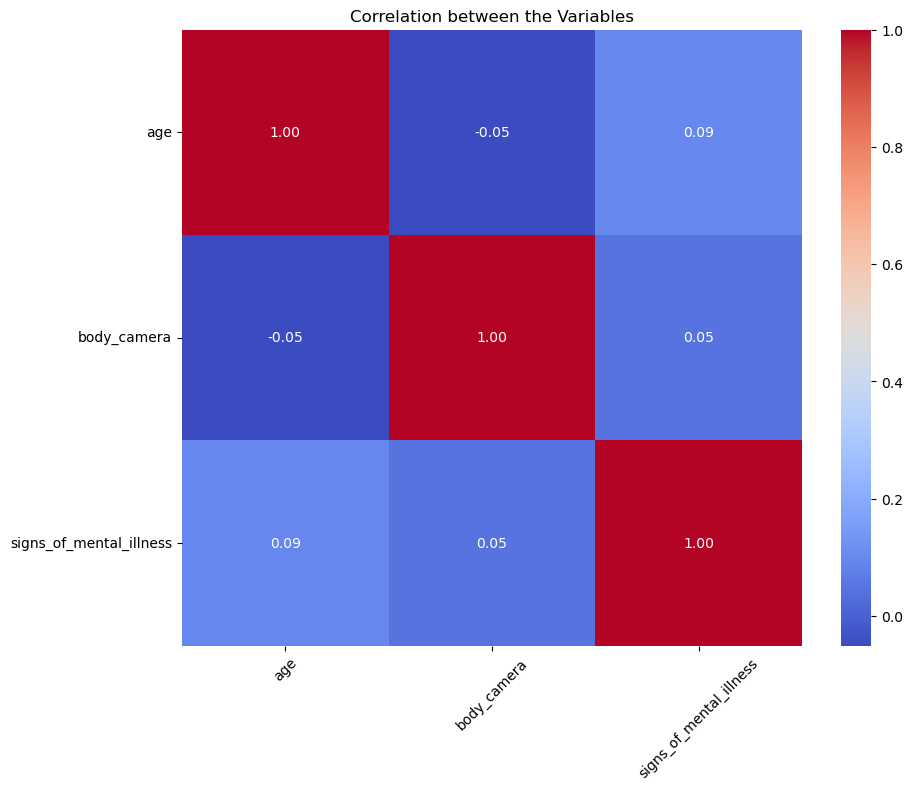

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV data into a DataFrame
data = pd.read_csv('2023-10-10-washington-post-police-shootings-export.csv')

# Create a correlation matrix (or another data matrix you want to visualize)
numeric_data = data.select_dtypes(include='number')
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Showing the heatmap on visual
plt.title('Correlation between the Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Doing the analysis of dataset containing the info about the Cops

In [141]:
df2 = pd.read_csv("fatal-police-shootings-agencies.csv")

In [142]:
df2.head()

id                                 name          type state oricodes  \
0  3145.0    Abbeville County Sheriff's Office       sheriff    SC  SC00100   
1  2576.0           Aberdeen Police Department  local_police    WA  WA01401   
2  2114.0            Abilene Police Department  local_police    TX  TX22101   
3  2088.0  Abington Township Police Department  local_police    PA  PA04601   
4  3187.0       Acadia Parish Sheriff's Office       sheriff    LA  LA00100   

   total_shootings   latitude   longitude  
0              1.0  47.246826 -123.121592  
1              1.0  45.487421 -122.891696  
2              3.0  37.694766  -97.280554  
3              1.0  37.762910 -122.422001  
4              1.0  40.383937 -104.692261

In [143]:
df2.tail()

id name type state oricodes  total_shootings   latitude   longitude
8811 NaN  NaN  NaN   NaN      NaN              NaN  36.045678 -115.082258
8812 NaN  NaN  NaN   NaN      NaN              NaN  34.087960 -117.293969
8813 NaN  NaN  NaN   NaN      NaN              NaN        NaN         NaN
8814 NaN  NaN  NaN   NaN      NaN              NaN  40.500568  -85.855018
8815 NaN  NaN  NaN   NaN      NaN              NaN  34.157371 -118.639494

In [144]:
df2.describe()

id  total_shootings     latitude     longitude
count   3322.000000      3322.000000  7816.000000  7.816000e+03
mean    2933.003010         2.839253    36.638347 -1.152403e+12
std     4312.615462         6.069312     5.345833  1.018818e+14
min        1.000000         1.000000    19.497503 -9.007180e+15
25%     1206.250000         1.000000    33.466244 -1.120142e+02
50%     2098.500000         1.000000    36.079347 -9.424667e+01
75%     2995.750000         2.000000    39.998813 -8.317548e+01
max    28842.000000       129.000000    71.301255 -6.786717e+01

In [145]:
column_median = df2['total_shootings'].median()
column_skewness = skew(df2['total_shootings'])
column_kurtosis = kurtosis(df2['total_shootings'])
print(f"Median for Total Shootings : {column_median}")
print(f"Skewness for Total Shootings : {column_skewness}")
print(f"Kurtosis for Total Shootings : {column_kurtosis}")

Median for Total Shootings : 1.0
Skewness for Total Shootings : nan
Kurtosis for Total Shootings : nan


In [169]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('fatal-police-shootings-agencies.csv')

# Select the features you want to use for clustering (e.g., columns 'feature1' and 'feature2')
selected_features = data[['id', 'total_shootings']]

# Perform data preprocessing if necessary (e.g., handling missing values or scaling)

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters (K)

# Fit the model to the data and obtain cluster labels
cluster_labels = kmeans.fit_predict(selected_features)

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Visualize the clusters (for two features)
plt.figure(figsize=(20, 12))
plt.scatter(data['id'], data['total_shootings'], c=data['Cluster'], cmap='viridis')
plt.xlabel('ID of an Officer')
plt.ylabel('Encounters')
plt.title('K-Means Clustering Plot for shootings as per the cops')
plt.grid()
plt.show()

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

/var/folders/g8/mxccscmj14l9stg98tmxsc2h0000gn/T/ipykernel_3899/3851918500.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


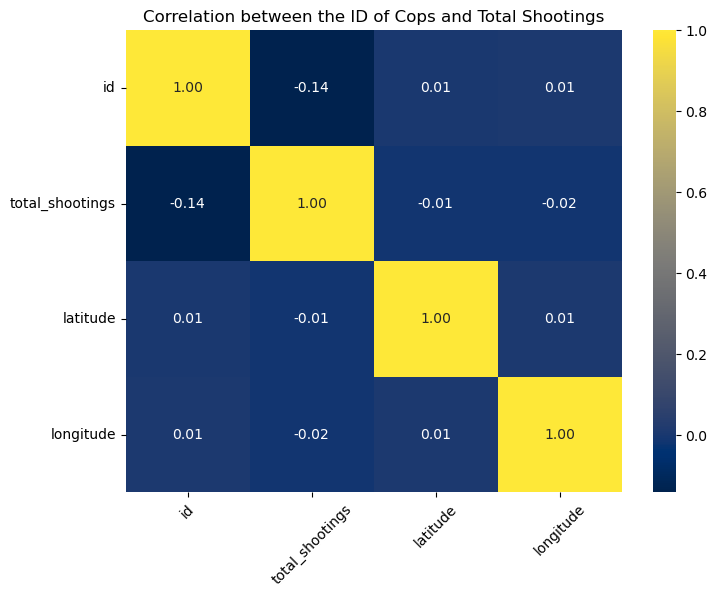

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV data into a DataFrame
data = pd.read_csv('fatal-police-shootings-agencies.csv')

# Create a correlation matrix (or another data matrix you want to visualize)
numeric_data = data.select_dtypes(include='number')
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")

# Showing the heatmap on visual
plt.title('Correlation between the ID of Cops and Total Shootings')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [148]:
import pandas as pd

df3 = pd.read_csv("fatal-police-shootings-updated-data.csv")

In [149]:
df3.head()

id        date threat_type flee_status armed_with           city  \
0   3  2015-01-02       point         not        gun        Shelton   
1   4  2015-01-02       point         not        gun          Aloha   
2   5  2015-01-03        move         not    unarmed        Wichita   
3   8  2015-01-04       point         not    replica  San Francisco   
4   9  2015-01-04       point         not      other          Evans   

          county state   latitude   longitude location_precision  \
0          Mason    WA  47.246826 -123.121592      not_available   
1     Washington    OR  45.487421 -122.891696      not_available   
2       Sedgwick    KS  37.694766  -97.280554      not_available   
3  San Francisco    CA  37.762910 -122.422001      not_available   
4           Weld    CO  40.383937 -104.692261      not_available   

                 name   age gender race    race_source  \
0          Tim Elliot  53.0   male    A  not_available   
1    Lewis Lee Lembke  47.0   male    W  not_available   
2  John Paul Quintero  23.0   male    H  not_available   
3     Matthew Hoffman  32.0   male    W  not_available   
4   Michael Rodriguez  39.0   male    H  not_available   

   was_mental_illness_related  body_camera agency_ids  
0                        True        False         73  
1                       False        False         70  
2                       False        False        238  
3                        True        False        196  
4                       False        False        473

In [150]:
df3.tail()

id        date threat_type flee_status          armed_with  \
8811  9550  2023-10-27        move         NaN               knife   
8812  9551  2023-10-28       shoot         NaN                 gun   
8813  9552  2023-10-30      threat         NaN                 gun   
8814  9554  2023-11-01      attack         NaN               knife   
8815  9553  2023-11-02        move        foot  blunt_object;knife   

                city                county state   latitude   longitude  \
8811       Henderson                 Clark    NV  36.045678 -115.082258   
8812  San Bernardino        San Bernardino    CA  34.087960 -117.293968   
8813             Tok  Fairbanks North Star    AK        NaN         NaN   
8814         Swayzee                 Grant    IN  40.500568  -85.855018   
8815       Calabasas           Los Angeles    CA  34.157371 -118.639494   

     location_precision               name   age gender race    race_source  \
8811              block    Lazaro Enriquez  26.0   male  NaN            NaN   
8812            address    David Rojas Sr.  53.0   male    H  public_record   
8813                NaN     Timothy Thomas  21.0   male  NaN            NaN   
8814       intersection  Brandon T. Decker  27.0   male    W  public_record   
8815            address                NaN   NaN   male  NaN            NaN   

      was_mental_illness_related  body_camera  agency_ids  
8811                       False        False         629  
8812                       False        False         595  
8813                       False        False         775  
8814                       False        False  3008;25217  
8815                       False        False          38

In [151]:
df3.describe()

id     latitude     longitude          age
count  8816.000000  7816.000000  7.816000e+03  8253.000000
mean   4854.853448    36.638347 -1.152402e+12    37.287895
std    2748.372016     5.345833  1.018817e+14    12.982118
min       3.000000    19.497503 -9.007175e+15     2.000000
25%    2473.750000    33.466244 -1.120142e+02    28.000000
50%    4885.500000    36.079347 -9.424667e+01    35.000000
75%    7232.250000    39.998813 -8.317548e+01    45.000000
max    9570.000000    71.301255 -6.786717e+01    92.000000

### Not to use below cell, just a rough work for the reference

In [152]:
import pandas as pd
import folium
import altair as alt
from folium.plugins import HeatMap
from sklearn.cluster import DBSCAN
import numpy as np

alt.data_transformers.disable_max_rows()

df = pd.read_csv("fatal-police-shootings-updated-data.csv")

df_cleaned = df.dropna(subset=['latitude', 'longitude'])
latitude_column = df_cleaned.iloc[:, 2]
longitude_column = df_cleaned.iloc[:, 3]
X = np.column_stack((latitude_column, longitude_column))
db = DBSCAN(eps=0.7, min_samples=10).fit(X) # You can adjust eps and min_samples as needed
labels = db.labels_

# Create a new DataFrame based on the cleaned one
df_result = df_cleaned.copy()

# Add cluster labels to the new DataFrame
df_result['Cluster'] = labels
# Now you can use df_result for further analysis and visualization

state = alt.topo_feature(data.us_10m.url,feature= 'states')
background=alt.Chart(state).mark_geoshape(
    fill='lightgrey', stroke='white').project('albersUsa').properties(
    width=1000,
    height=600
    )

point=alt.Chart(df_result).mark_circle().encode(
longitude='longitude:Q', # Use ‘longitude’ from df_result
latitude='latitude:Q', # Use ‘latitude’ from df_result
color='Cluster:N'
).properties(
width=1000,
height=600
)

#threshold = mean_age + 2 * stdev
#num_points_above_thresholrd = len(AllAges[AllAges > threshold])
#percentage_above_threshold = (num_points_above_threshold / len(AllAges)) * 100
#print(f"The value of Mean + 2 * Standard Deviation: {threshold:.4f}”)
#print(f"The percentage of data points more than 2 standard deviations from the mean: {percentage_above_threshold:.4f}%”)

ValueError: could not convert string to float: 'point'

# Visualizing both the dadatsets as per the shootings and the information about the cops

### Ploting the Heat Map for the updated dataset

/var/folders/g8/mxccscmj14l9stg98tmxsc2h0000gn/T/ipykernel_3899/4220001167.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


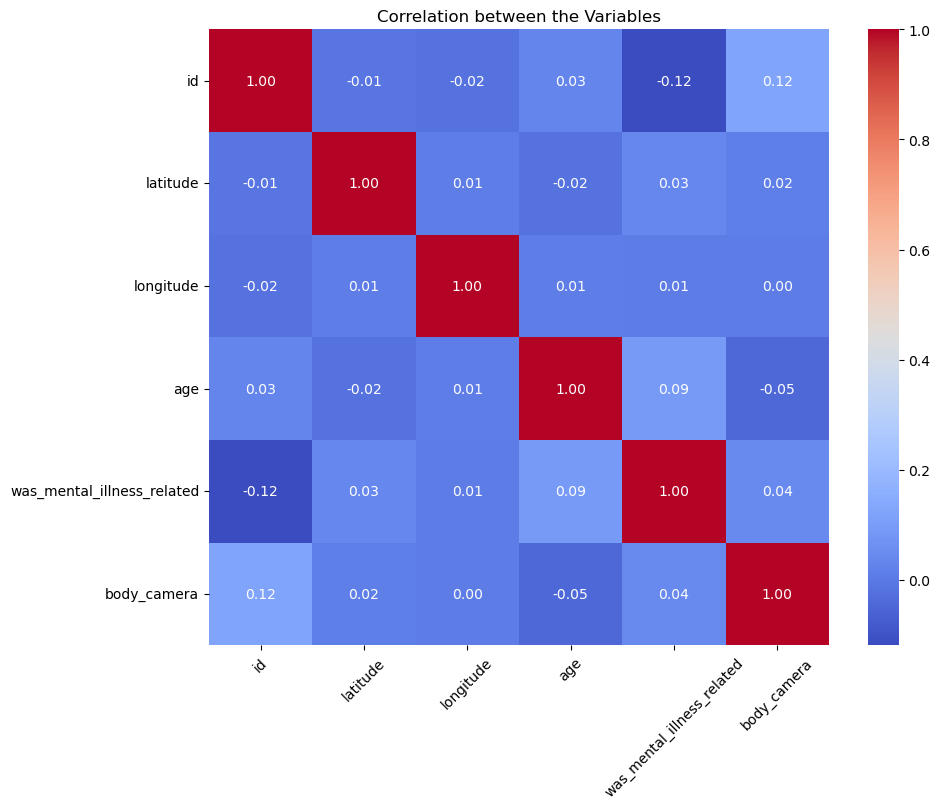

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV data into a DataFrame
data = pd.read_csv('fatal-police-shootings-updated-data.csv')

# Create a correlation matrix (or another data matrix you want to visualize)
numeric_data = data.select_dtypes(include='number')
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Showing the heatmap on visual
plt.title('Correlation between the Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### Visualizing the datasets on the geo histogram of the shootimgs in United States in different cities

In [154]:
df_killed.head()

id        date threat_type flee_status armed_with           city  \
0   3  2015-01-02       point         not        gun        Shelton   
1   4  2015-01-02       point         not        gun          Aloha   
2   5  2015-01-03        move         not    unarmed        Wichita   
3   8  2015-01-04       point         not    replica  San Francisco   
4   9  2015-01-04       point         not      other          Evans   

          county state   latitude   longitude location_precision  \
0          Mason    WA  47.246826 -123.121592      not_available   
1     Washington    OR  45.487421 -122.891696      not_available   
2       Sedgwick    KS  37.694766  -97.280554      not_available   
3  San Francisco    CA  37.762910 -122.422001      not_available   
4           Weld    CO  40.383937 -104.692261      not_available   

                 name   age gender race    race_source  \
0          Tim Elliot  53.0   male    A  not_available   
1    Lewis Lee Lembke  47.0   male    W  not_available   
2  John Paul Quintero  23.0   male    H  not_available   
3     Matthew Hoffman  32.0   male    W  not_available   
4   Michael Rodriguez  39.0   male    H  not_available   

   was_mental_illness_related  body_camera agency_ids  
0                        True        False         73  
1                       False        False         70  
2                       False        False        238  
3                        True        False        196  
4                       False        False        473

In [155]:
import pandas as pd
import numpy as np
import altair as alt

df_killed = pd.read_csv("fatal-police-shootings-updated-data.csv")

alt.data_transformers.disable_max_rows()
from vega_datasets import data
state = alt.topo_feature(data.us_10m.url,feature= 'states')
background=alt.Chart(state).mark_geoshape(
    fill='lightpink',
    stroke='black',
    strokeWidth=0.5
).project('albersUsa').properties(
    width=1000,
    height=600
)

point = alt.Chart(df_killed).mark_circle().encode(
    longitude='longitude',
    latitude='latitude',
    size=alt.value(20),
    #tooltip='race'
    tooltip=['name:N', 'race:N', 'armed_with:N', 'flee_status:N']
    
   # alt.Color('value:Q', scale=alt.Scale(scheme='greenblue')),
   # alt.Tooltip('country:N', title='Country'),
   # alt.Tooltip('value:Q', title='Value'),
   # alt.Tooltip('other_info:N', title='Other Info'),
   # color=alt.Color('race:N', scale=alt.Scale(domain=['white', 'black'], range=['red', 'blue']))
)
background + point

alt.LayerChart(...)

In [156]:
df_cops.head()

id                                 name          type state oricodes  \
0  3145.0    Abbeville County Sheriff's Office       sheriff    SC  SC00100   
1  2576.0           Aberdeen Police Department  local_police    WA  WA01401   
2  2114.0            Abilene Police Department  local_police    TX  TX22101   
3  2088.0  Abington Township Police Department  local_police    PA  PA04601   
4  3187.0       Acadia Parish Sheriff's Office       sheriff    LA  LA00100   

   total_shootings   latitude   longitude  
0              1.0  47.246826 -123.121592  
1              1.0  45.487421 -122.891696  
2              3.0  37.694766  -97.280554  
3              1.0  37.762910 -122.422001  
4              1.0  40.383937 -104.692261

In [157]:
import pandas as pd
import numpy as np
import altair as alt

df_cops = pd.read_csv("fatal-police-shootings-agencies.csv")

alt.data_transformers.disable_max_rows()
from vega_datasets import data
state = alt.topo_feature(data.us_10m.url,feature= 'states')
background=alt.Chart(state).mark_geoshape(
    fill='lightgray',
    stroke='green',
    strokeWidth=0.5
).project('albersUsa').properties(
    width=1000,
    height=600
)

point = alt.Chart(df_cops).mark_circle().encode(
    longitude='longitude',
    latitude='latitude',
    size=alt.value(20),
    tooltip=['name:N', 'type:N', 'oricodes:N']
    
)
background + point

alt.LayerChart(...)

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load your CSV dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('fatal-police-shootings-updated-data.csv')

# Assuming 'target' is the column you want to predict, and other columns are features
# Replace 'target' and 'features' with your actual column names
target_column = 'race'
features_columns = ['id', 'latitude', 'longitude']

# Extract features and target variable
X = df[features_columns]
y = df[target_column]

# Handle missing values by filling NaN with the mean of each column
X.loc[:, X.columns] = X[X.columns].fillna(X.mean())

# Convert non-numeric values in the target column to numeric using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

/var/folders/g8/mxccscmj14l9stg98tmxsc2h0000gn/T/ipykernel_3899/193356259.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, X.columns] = X[X.columns].fillna(X.mean())


Accuracy: 0.48
Confusion Matrix:
 [[  4   6   6   0   0  20   2]
 [  0 163  21   0   0 184  41]
 [  2  36 104   0   1 112  33]
 [  0   1   3   1   0  21   3]
 [  0   3   1   0   0   1   1]
 [  4 125  59   2   2 500  73]
 [  1  40  28   0   0  79  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.11      0.16        38
           1       0.44      0.40      0.42       409
           3       0.47      0.36      0.41       288
           4       0.33      0.03      0.06        29
           5       0.00      0.00      0.00         6
           6       0.55      0.65      0.59       765
           7       0.35      0.35      0.35       229

    accuracy                           0.48      1764
   macro avg       0.36      0.27      0.28      1764
weighted avg       0.47      0.48      0.47      1764



### Applying the Staistical Regression method to chekc for the accuracy and performance of an predictive model

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('fatal-police-shootings-updated-data.csv')
df = df.dropna()

# Assuming 'armed' is the target variable
X = df[['age', 'race']]  # Features
y = df['armed_with']  # Target variable
from sklearn.preprocessing import LabelEncoder

# Check unique values in 'race'
print(df['race'].unique())

# Use label encoding for 'race' column
label_encoder = LabelEncoder()
X['race'] = label_encoder.fit_transform(X['race'])

# Fit and transform the modified test set
X_test['race'] = label_encoder.transform(X_test['race'])

from sklearn.preprocessing import LabelEncoder

# Convert categorical features to numerical using one-hot encoding
X.fillna(X.mean(), inplace=True)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
# Convert one-hot encoded 'race' back to original format
X_test['race'] = label_encoder.inverse_transform(X_test['race'])
print(label_encoder.classes_)
result_df = pd.DataFrame({'Age': X_test['age'],
                          #'Race': label_encoder.inverse_transform(X_test['race']),
                          'Race': X_test['race'],
                          'Actual': y_test,
                          'Predicted': y_pred})
print(result_df)

['A' 'W' 'H' 'B' 'O' 'N']
Accuracy: 0.57
                           precision    recall  f1-score   support

             blunt_object       0.00      0.00      0.00        15
blunt_object;blunt_object       0.00      0.00      0.00         1
                      gun       0.61      0.94      0.74       346
                gun;knife       0.00      0.00      0.00         2
                    knife       0.24      0.09      0.13       101
       knife;blunt_object       0.00      0.00      0.00         2
                    other       0.00      0.00      0.00         8
                  replica       0.00      0.00      0.00        26
                  unarmed       0.17      0.02      0.03        57
             undetermined       0.00      0.00      0.00        12
                  unknown       0.00      0.00      0.00         6
                  vehicle       0.00      0.00      0.00         8
              vehicle;gun       0.00      0.00      0.00         2

                 ac

/var/folders/g8/mxccscmj14l9stg98tmxsc2h0000gn/T/ipykernel_3899/369504834.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['race'] = label_encoder.fit_transform(X['race'])
/var/folders/g8/mxccscmj14l9stg98tmxsc2h0000gn/T/ipykernel_3899/369504834.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
/Users/jisusingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set t